<h2> <center>Artificial Intelligence for Robotics Mini Projects<center></h2>

<h3>Name : Arjun</h3>
<h3>roll : 20243005</h3>

<h4>Introduction</h4>
<p> I have taken 1700 images of 17 celebrities to complete this model <br>
I have used dictionary to dynamically process any number of images present in labelled folders<br>
you can just place your custom folder with custom images its name as the label for classification inside images folder<br>
100 images would be preferrable to train the model


<h4>Import all modules</h4>

In [1]:
import os
import warnings
warnings.simplefilter('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import imageio
from skimage.io import imread,imshow
from skimage.transform import resize
from skimage.color import rgb2gray
from bing_image_downloader import downloader
import random

<h3>Data collection from bing images</h3>

In [2]:
total = int(input("Enter total number of images to be downloaded: "))
list_of_names = []
for i in range(1,total+1):
    img  = input("enter image name: ")
for j in list_of_names:
    downloader.download(j, limit=100,  output_dir='images', adult_filter_off=True, force_replace=False, timeout=60)
    print("Image downloaded successfully")

Enter total number of images to be downloaded: 


ValueError: invalid literal for int() with base 10: ''

In [4]:
personalities = os.listdir('images')[0:5]
personalities

['Angelina Jolie',
 'Brad Pitt',
 'Denzel Washington',
 'Hugh Jackman',
 'Jennifer Lawrence']

<h3>image processing</h3>

Rename images to number from 1 to 100


In [5]:
import os
personalities = os.listdir('images')
for i in personalities:
    arr = os.listdir('images/'+ i)
    for j in range(len(arr)):
        old_name = 'D:/projects/tutorials/AI_industry course/images/{}/{}'.format(i,arr[j])#old name of image
        new_name = 'D:/projects/tutorials/AI_industry course/images/{}/{}'.format(i,"{}.jpg".format(j))#numbers
        print(new_name)
        os.rename(old_name, new_name)


D:/projects/tutorials/AI_industry course/images/Angelina Jolie/0.jpg


FileNotFoundError: [Errno 2] No such file or directory: 'D:/projects/tutorials/AI_industry course/images/Angelina Jolie/11.jpg' -> 'D:/projects/tutorials/AI_industry course/images/Angelina Jolie/0.jpg'

converting all the images to arrays

In [6]:
image_set = {}
limit = 100
for i in personalities:
    j=0
    image_set[i] = [None]*limit
    for k in os.listdir('images/{}'.format(i)):
        print(k)
        if j<limit:
            image_set[i][j] = imread('D:/projects/tutorials/AI_industry course/images/{}/{}'.format(i,k))#reading the images and converting it to array
            j+=1
        else:
            break

11.jpg


FileNotFoundError: No such file: '/media/arjun/Arjun/projects/tutorials/AI_industry course/D:/projects/tutorials/AI_industry course/images/Angelina Jolie/11.jpg'

In [41]:
len(image_set[random.choice(personalities)])

100

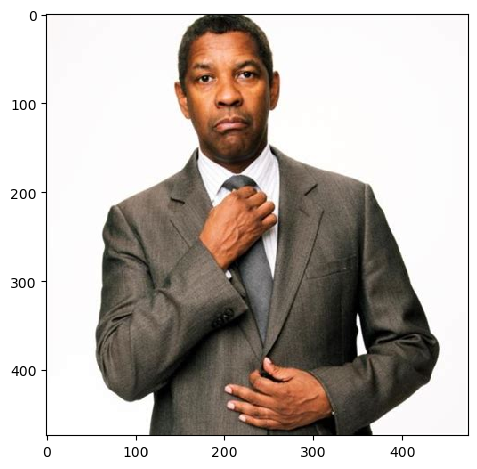

In [42]:
imshow(image_set[random.choice(personalities)][8])

changing the images to gray scale

In [43]:
image_set_gray = {}
limit = 100
for i in personalities:
    j=0
    image_set_gray[i] = [None]*limit
    for k in os.listdir('images/{}'.format(i)):
        if j<limit:
            try:
                image_set_gray[i][j] = rgb2gray(image_set[i][j][:,:,0:3])#all the images saved as array will be converted to gray scale
            except:
                pass
            j+=1
        else:
            break
    print(i,":",len(image_set_gray[i]))

Angelina Jolie : 100
Brad Pitt : 100
Denzel Washington : 100


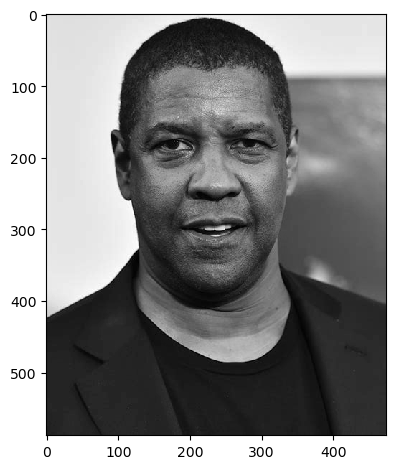

In [44]:
imshow(image_set_gray[random.choice(personalities)][0])

Image must be resized to maintain normality<br>
Its an very important step as various images are of various dimensions

In [45]:
for i in personalities:
    for j in range(100):
            image_set_gray[i][j] = resize(image_set_gray[i][j], (500,500))

In [46]:
len_of_images = {}
for i in personalities:
    len_of_images[i] = len(image_set_gray[i])
len_of_images

{'Angelina Jolie': 100, 'Brad Pitt': 100, 'Denzel Washington': 100}

In [47]:
image_size = {}
for i in personalities:
    image_size[i] = image_set_gray[i][0].shape
image_size

{'Angelina Jolie': (500, 500),
 'Brad Pitt': (500, 500),
 'Denzel Washington': (500, 500)}

In [48]:
flat = image_size[random.choice(personalities)][0]*image_size[random.choice(personalities)][1]

In [49]:
flat

250000

Flatten,Dstack and resize the 2D array of images into 1D array to be used by the ML model to train

In [50]:
for i in personalities:
    for j in range(len_of_images[i]):
        image_set_gray[i][j] = np.ndarray.flatten(image_set_gray[i][j]).reshape(flat,1)

In [51]:
for i in personalities:
    image_set_gray[i] = np.dstack(image_set_gray[i])

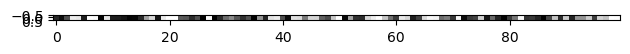

In [52]:
imshow(image_set_gray[random.choice(personalities)][1])

In [53]:
for i in personalities:
    image_set_gray[i] = np.rollaxis(image_set_gray[i],axis=2,start=0)

In [54]:
image_set_gray[random.choice(personalities)].shape

(100, 250000, 1)

In [55]:
for i in personalities:
    image_set_gray[i] = image_set_gray[i].reshape(len_of_images[i],flat)

Convert various images into dataframes to be used by the model

In [56]:
dataframeset = {}
for i in personalities:
    dataframeset[i] = pd.DataFrame(image_set_gray[i])

In [57]:
for i in personalities:
    dataframeset[i]['label'] = i

Concat all the dataframe 

In [58]:
actor_final = pd.DataFrame()
for i in personalities:
    actor_final = pd.concat([actor_final,dataframeset[i]])

In [59]:
actor_final

,0,1,2,3,4,5,6,7,8,9,...,249991,249992,249993,249994,249995,249996,249997,249998,249999,label
0,0.842421,0.832122,0.824167,0.819904,0.822194,0.825912,0.824616,0.823217,0.821376,0.820002,...,0.116721,0.116259,0.119811,0.123529,0.125475,0.121349,0.116765,0.136469,0.256055,Angelina Jolie
1,0.740439,0.726475,0.711524,0.699848,0.692542,0.685034,0.678727,0.673095,0.663576,0.655038,...,0.343659,0.378715,0.386685,0.361449,0.354626,0.354081,0.330531,0.349564,0.405784,Angelina Jolie
2,0.048529,0.048269,0.036870,0.084272,0.225757,0.401664,0.545700,0.632898,0.661956,0.674162,...,0.037148,0.044268,0.052556,0.062621,0.072453,0.078765,0.081306,0.100951,0.236595,Angelina Jolie
3,0.846287,0.839259,0.828412,0.823675,0.825965,0.829683,0.830804,0.828412,0.829071,0.830804,...,0.112051,0.112051,0.112051,0.112051,0.112051,0.112051,0.111674,0.119930,0.243767,Angelina Jolie
4,0.082621,0.082621,0.082621,0.082621,0.082621,0.082621,0.082621,0.082621,0.080489,0.080734,...,0.046872,0.051248,0.049923,0.046205,0.042487,0.040197,0.041366,0.044236,0.233978,Angelina Jolie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.099125,0.099125,0.099125,0.099125,0.099125,0.099125,0.099125,0.099125,0.099125,0.098733,...,0.113820,0.113820,0.113820,0.113820,0.113820,0.113820,0.113820,0.113820,0.113820,Denzel Washington
96,0.153193,0.153193,0.153193,0.153193,0.153193,0.153193,0.153193,0.153193,0.153193,0.156362,...,0.429047,0.441242,0.420031,0.484764,0.405471,0.386964,0.350705,0.294837,0.302493,Denzel Washington
97,0.182244,0.182244,0.182244,0.182244,0.182244,0.182244,0.182244,0.182244,0.186449,0.187796,...,0.267143,0.266484,0.271527,0.280084,0.289402,0.292405,0.296994,0.331370,0.373535,Denzel Washington
98,0.783580,0.776553,0.772529,0.772020,0.772290,0.772373,0.767297,0.762206,0.764984,0.766467,...,0.025164,0.033500,0.045612,0.050753,0.051586,0.056867,0.066256,0.077660,0.226695,Denzel Washington


<h2>Tranining<h2>

Train test split

In [60]:
x = actor_final.values[:,:-1]
y = actor_final.values[:,-1]

In [61]:
y

array(['Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie', 'Angelina Jolie', 'Angelina Jolie',
       'Angelina Jolie',

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

SVM algorithm 

In [64]:
from sklearn import svm

In [65]:
clf = svm.SVC()
clf.fit(x_train,y_train)

SVC()

In [66]:
ypred = clf.predict(x_test)

In [67]:
from sklearn.metrics import accuracy_score,confusion_matrix


In [68]:
accuracy_score(y_test,ypred)

0.6666666666666666

In [69]:
confusion_matrix(y_test, ypred)

array([[15,  4,  1],
       [ 3, 10,  7],
       [ 1,  4, 15]], dtype=int64)

RandomForest Algorithm

In [70]:
from sklearn.ensemble import RandomForestClassifier

In [71]:
model=RandomForestClassifier()

In [72]:
model.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
y_pred=model.predict(x_test)

In [74]:
accuracy_score(y_test,y_pred)

0.6666666666666666